## Locally Weighted Regression

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
dfx=pd.read_csv("./weightedX.csv")
dfy=pd.read_csv("./weightedY.csv")

In [48]:
print(dfx.shape)
print(dfy.shape)

(99, 1)
(99, 1)


In [7]:
dfx.head(5)

,1.2421
0,2.33480
1,0.13264
2,2.34700
3,6.73890
4,3.70890


In [8]:
dfy.head(5)

,1.1718
0,1.88240
1,0.34283
2,2.10570
3,1.64770
4,2.36240


In [50]:
X=dfx.values
Y=dfy.values

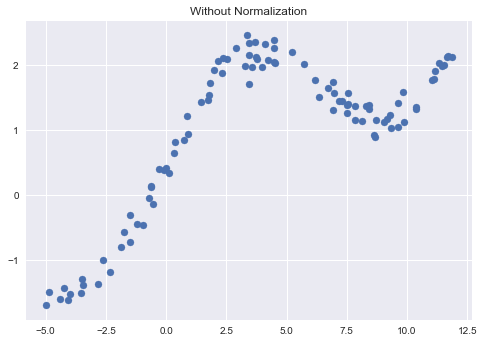

In [51]:
plt.style.use("seaborn")
plt.title("Without Normalization")
plt.scatter(X,Y)
plt.show()

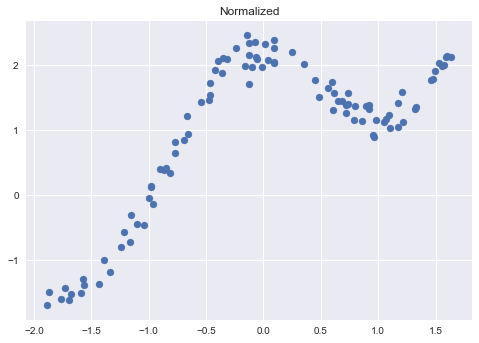

In [53]:
u=X.mean()
std=X.std()
X=(X-u)/std


plt.style.use("seaborn")
plt.title("Normalized")
plt.scatter(X,Y)
plt.show()

### Formula
1. $ theta= (X^TWX)^-1X^TWY $
- $ W(i)=exp^-(x(i)-x)^2/-2T^2 $

In [26]:
mati=np.eye(5)
print(mat)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [37]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    
    for i in range(M):
        xi=X[i]
        x=query_point
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        W[i,i]=np.round(W[i,i],decimals=3)
    return W

In [33]:
X=np.mat(X)
Y=np.mat(Y)

In [38]:
W=getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[0.004 0.    0.    ... 0.    0.    0.   ]
 [0.    0.527 0.    ... 0.    0.    0.   ]
 [0.    0.    0.004 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [61]:
def predict(X,Y,query_x,tau):
    M=X.shape[0]
    ones=np.ones((M,1))
    x_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    
    W=getW(qx,x_,tau)
    
    # theta=(X'WX)inv (X'WY)
    
    theta=np.linalg.inv(x_.T*(W*x_))*(x_.T*(W*Y))
    pred=np.dot(qx,theta)
    return theta,pred
    

In [62]:
theta,pred=predict(X,Y,1.0,1.0)
print(theta)

[[0.14032637]
 [1.4537854 ]]


In [63]:
print(pred)

[[1.59411176]]


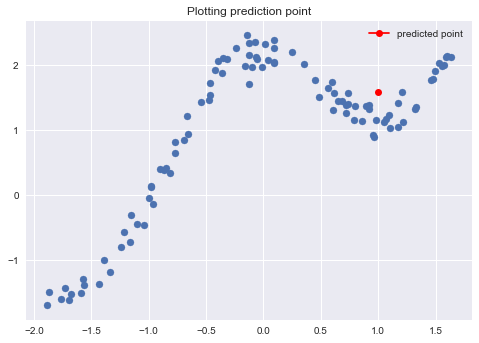

In [79]:
plt.style.use("seaborn")
plt.title("Plotting prediction point")
plt.scatter(X,Y)
plt.plot(1.0,pred,color='red',marker='o',label="predicted point")
plt.legend()
plt.show()


### Visualizing Data points on effect of tau

In [89]:
def visualization(tau):
    x_test=np.linspace(-2,2,20)
    y_test=[]
    
    for xq in x_test:
        theta,pred=predict(X,Y,xq,tau)
        y_test.append(pred)
        
    y_test=np.array(y_test)
    
    xo=np.array(X)
    
    yo=np.array(Y)
    
    plt.scatter(xo,yo)
    plt.scatter(x_test,y_test,c='red')
    plt.show()

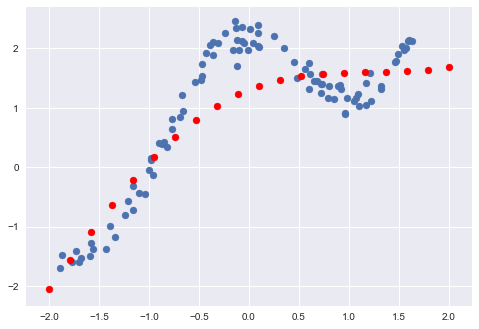

In [90]:
visualization(1.0)

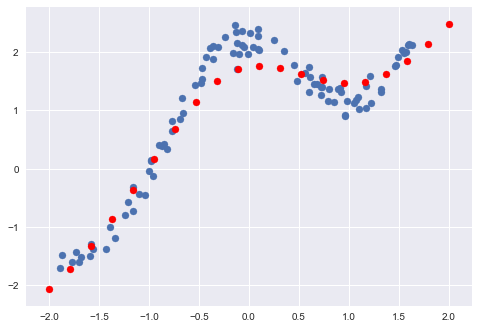

In [92]:
visualization(0.5)